In [44]:
import torch
import torch.nn as nn
from torchvision.transforms import ToTensor

import pandas as pd

from tqdm import tqdm

import matplotlib.pyplot as plt
from PIL import Image

from random import randint

import numpy as np

import cv2 as cv2

from model import MiniGoogLeNet

In [7]:
def load_sample(i):

    t = ToTensor()

    dataset_path = "../dataset/test/test_images/"

    image_name = dataset_path+str(i)+".jpg"

    image_tensor = t(Image.open(image_name))

    return image_tensor

In [124]:
model = MiniGoogLeNet()
model.load_state_dict(torch.load("../nets/testa123.pt", map_location='cpu'))

<All keys matched successfully>

torch.Size([3, 96, 96])


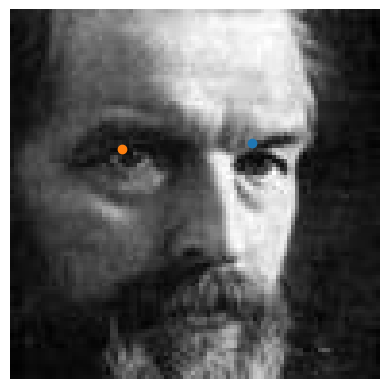

In [131]:
i = randint(0, 1500)
sample = load_sample(i)

image_array = sample.numpy()
image_rgb = np.transpose(image_array, (1, 2, 0))
plt.imshow(image_rgb)
plt.axis('off')

print(sample.shape)

pred = model(sample.unsqueeze(dim=0)).squeeze().detach().numpy()

left = [pred[0], pred[1]]
right = [pred[2], pred[3]]
plt.scatter(*left)
plt.scatter(*right)

plt.show()